<a href="https://colab.research.google.com/github/makavelisson/machine_learning/blob/master/Mirador_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
# Statistical and data manipulation packages
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Question 1A

In [118]:
# Generate a df with 8 columns and 3 variables within each column.
df = pd.DataFrame(np.random.randint(0,3,size=(50000, 8)), columns=list('ABCDEFGH'))

In [119]:
# Check the shape of the data to ensure the right dimensions
df.head(5000)

,A,B,C,D,E,F,G,H
0,1,2,2,1,2,2,1,1
1,0,1,1,1,1,0,0,2
2,2,2,2,0,2,0,0,2
3,2,0,1,0,1,0,0,1
4,2,0,2,2,2,0,1,0
...,...,...,...,...,...,...,...,...
4995,2,0,0,0,0,0,2,1
4996,0,2,0,0,2,1,2,0
4997,1,2,0,2,1,1,1,2
4998,1,2,1,1,1,1,2,2


In [120]:
# Iterate through the columns to change from numerical to categorical
def num_to_cat(df):
  columns= list(df)
  for x in columns:
    df[x].replace({0:'A', 1:'B', 2:'C'}, inplace=True)
  return df
num_to_cat(df)

,A,B,C,D,E,F,G,H
0,B,C,C,B,C,C,B,B
1,A,B,B,B,B,A,A,C
2,C,C,C,A,C,A,A,C
3,C,A,B,A,B,A,A,B
4,C,A,C,C,C,A,B,A
...,...,...,...,...,...,...,...,...
49995,C,B,B,A,A,C,C,B
49996,B,B,C,C,B,A,A,B
49997,A,A,C,C,A,C,B,B
49998,B,A,C,B,B,B,B,A


In [ ]:
# Check to see if the data is evenly distributed
df.describe()

,A,B,C,D,E,F,G,H
count,50000,50000,50000,50000,50000,50000,50000,50000
unique,3,3,3,3,3,3,3,3
top,B,C,A,A,B,A,B,A
freq,16893,16734,16738,16855,16713,16694,16947,16772


Question 1B)

In [122]:
# Verify that the proportions for each category, within each column are roughly equal
def analysis(df):
  columns = list(df)
  for x in columns:
    print(df[x].value_counts())
analysis(df)

B    16893
A    16559
C    16548
Name: A, dtype: int64
C    16734
B    16728
A    16538
Name: B, dtype: int64
A    16738
C    16709
B    16553
Name: C, dtype: int64
A    16855
C    16601
B    16544
Name: D, dtype: int64
B    16713
C    16688
A    16599
Name: E, dtype: int64
A    16694
C    16657
B    16649
Name: F, dtype: int64
B    16947
A    16543
C    16510
Name: G, dtype: int64
A    16772
B    16616
C    16612
Name: H, dtype: int64


Question 1C)

In [123]:

# Check how many unique rows are possible (permutation of category levels).
from itertools import combinations_with_replacement

# All possible combinations of [A,B,C] with a length of 8
total =0
cwr = combinations_with_replacement(['A','B','C'], 8)
for i in list(cwr):
  total+=1
print(total)



45


45 unique rows can be formed from a choice of A, B or C in a set of 8.

Question 1D)

In [124]:
# Create new dataframe for group sizes by permutation
df1=df.groupby(df.columns.tolist(),as_index=False).size()
df1

,A,B,C,D,E,F,G,H,size
0,A,A,A,A,A,A,A,A,7
1,A,A,A,A,A,A,A,B,7
2,A,A,A,A,A,A,A,C,10
3,A,A,A,A,A,A,B,A,8
4,A,A,A,A,A,A,B,B,4
...,...,...,...,...,...,...,...,...,...
6547,C,C,C,C,C,C,B,B,10
6548,C,C,C,C,C,C,B,C,9
6549,C,C,C,C,C,C,C,A,6
6550,C,C,C,C,C,C,C,B,14


In [107]:
# Remove all rows with a size larger than 10.
df1 = df1[df1['size'] < 11]
df1

,A,B,C,D,E,F,G,H,size
0,A,A,A,A,A,A,A,A,8
1,A,A,A,A,A,A,A,B,2
2,A,A,A,A,A,A,A,C,3
3,A,A,A,A,A,A,B,A,8
4,A,A,A,A,A,A,B,B,6
...,...,...,...,...,...,...,...,...,...
6553,C,C,C,C,C,C,B,A,9
6555,C,C,C,C,C,C,B,C,7
6556,C,C,C,C,C,C,C,A,9
6557,C,C,C,C,C,C,C,B,7


In [108]:
# Number of groups and group sizes
df1['size'].value_counts()

7     957
8     905
6     848
9     757
5     684
10    583
4     484
3     242
2      80
1      28
Name: size, dtype: int64

In [125]:

# Create a table highlighting the size of groups and number of groups
size = [1,2,3,4,5,6,7,8,9,10]  
groups = [985,874,821,805,681,619,459,226,100,23]
lists = list(zip(size, groups))
df2 = pd.DataFrame(lists, columns = ['group size', 'no. of groups'])
df2

,group size,no. of groups
0,1,985
1,2,874
2,3,821
3,4,805
4,5,681
5,6,619
6,7,459
7,8,226
8,9,100
9,10,23


Question 1E)

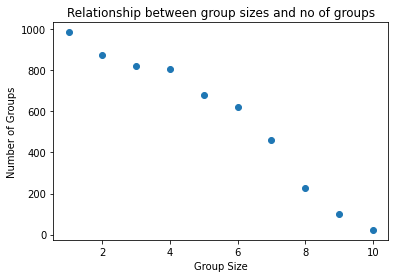

The pearsons corrrelation coefficient is: -0.976397538184195 
This suggests that there is a strong negative linear correlation between the group size and number of groups.


In [132]:

#Plot scatter plot for the group sizes and Pearson's R^2 value
x=df2['group size']
y=df2['no. of groups']

plt.scatter(x,y)
plt.title('Relationship between group sizes and no of groups')
plt.xlabel('Group Size')
plt.ylabel('Number of Groups')
plt.show()

print('The pearson''s corrrelation coefficient is:',x.corr(y),'\nThis suggests that there is a strong negative linear correlation between the group size and number of groups.')

Question 1F)

If the random variables were useful information on individuals, I would be most concerned about the lower group sizes, such as group size 1. As the information within these groups will be particularly unique in this dataset, it stands to reason that that unique combination of data may be used to identify an indivdual or sensitive information about them.

Question 1G)

Consider the effect of missing data in the dataset you created in Part a). How might this complicate the production of a frequency table of group sizes in Part d)?

If there was missing data from part 1A, this would complicate the prodcution of the frequency table in part 1D as the number of groups would be miscalculated as a result of missing data. Some instances may appear to be identical as they may both have the same data, both with missing values in the 6th column. This is an issue as the instances may have differed in the value of the missing attribute, which causes miscategorisation.